In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -----------------------------
# 1. Load & Inspect the Data
# -----------------------------
path = "/content/drive/MyDrive/Colab Notebooks/02_portfolio_tableau_viz/daily_per_capita_food_availability_US_1970_2017.csv"
df = pd.read_csv(path)

In [ ]:
print("\nBasic Info:")
print(df.info())
print("\nMissing Values:")
print(df.isna().sum())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        48 non-null     int64  
 1   Meat & Eggs & Nuts (Ounces)                 48 non-null     float64
 2   Dairy (Cups)                                48 non-null     float64
 3   Fruit (Cups)                                48 non-null     float64
 4   Vegetables (Cups)                           48 non-null     float64
 5   Flour and cereal products (Ounces)          48 non-null     float64
 6   Added fats and oils and dairy fats (Grams)  41 non-null     float64
 7   Added sugars (Teaspoons)                    48 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 3.1 KB
None

Missing Values:
Year                                          0
Meat & Eggs & Nuts (Ounces)        

In [ ]:

df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.sort_values('Year')
df = df.set_index('Year')
food_columns = df.columns.tolist()

In [ ]:
# =====================================================
# 2. Forecast missing years for "Added Fats and Oil"
# =====================================================
special_col = 'Added fats and oils and dairy fats (Grams)'

# Separate training data: 1970-2010
train_special = df.loc[:'2010', special_col]

# Fit ARIMA (order can be tuned)
model_special = ARIMA(train_special, order=(1,1,1))
model_special_fit = model_special.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecast missing years (2011-2017)
n_missing = 2017 - 2010
forecast_missing = model_special_fit.forecast(steps=n_missing)

# Fill missing values into original DataFrame
missing_index = pd.date_range(start='2011', end='2017', freq='YS') # Year Start
df.loc[missing_index, special_col] = forecast_missing.values

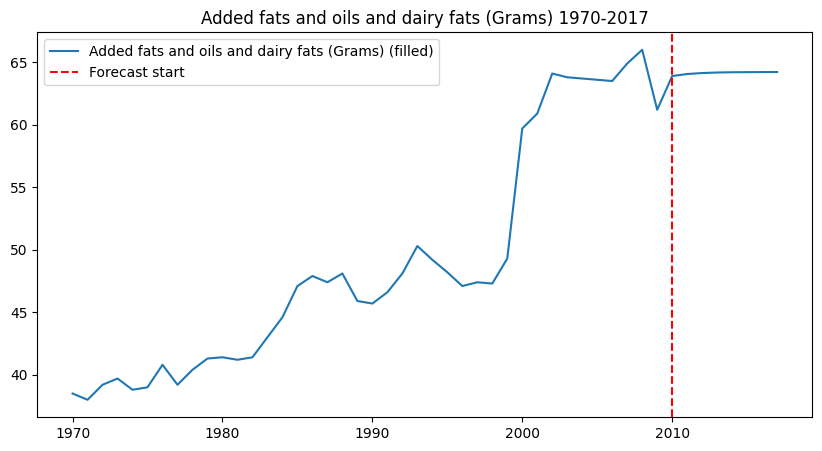

In [ ]:
# Plot historical + filled values
plt.figure(figsize=(10,5))
plt.plot(df[special_col], label=f"{special_col} (filled)")
plt.axvline(x=pd.to_datetime('2010'), color='r', linestyle='--', label='Forecast start')
plt.title(f"{special_col} 1970-2017")
plt.legend()
plt.show()

In [ ]:
# =====================================================
# 3. Forecast all columns (1970-2017) into future
# =====================================================
df.index = df.index.year   # Make index integers (1970,1971,…)

future_years = 10

results = {}
forecasts = {}

last_year = df.index.max()


Processing Meat & Eggs & Nuts (Ounces)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

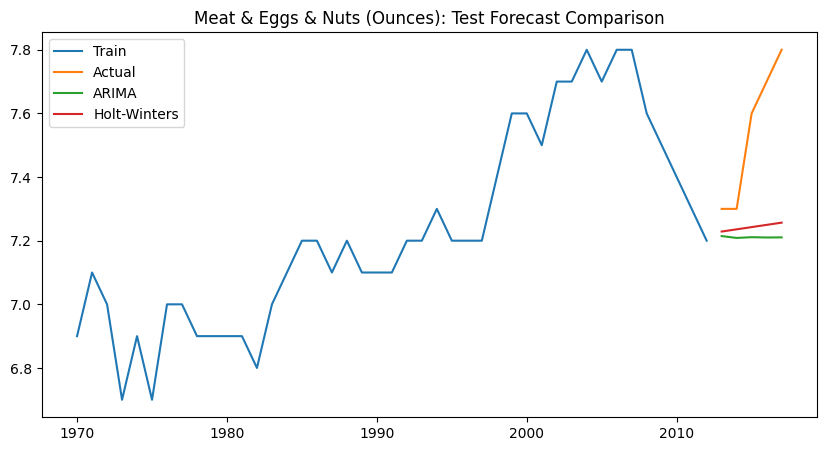

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


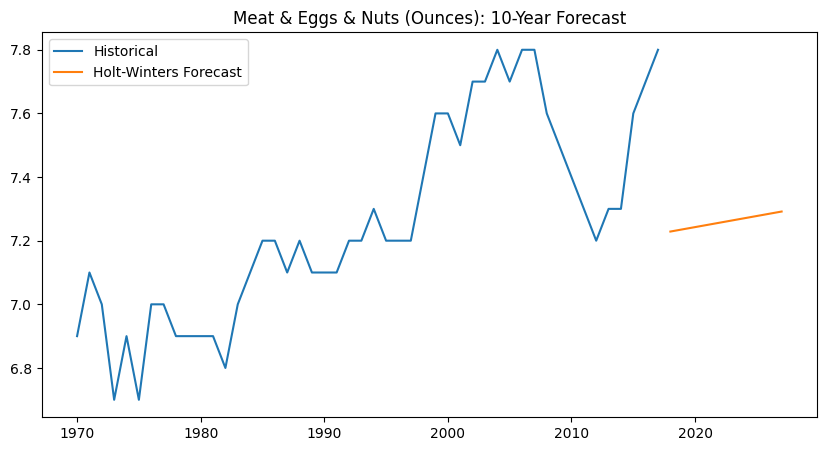


Processing Dairy (Cups)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

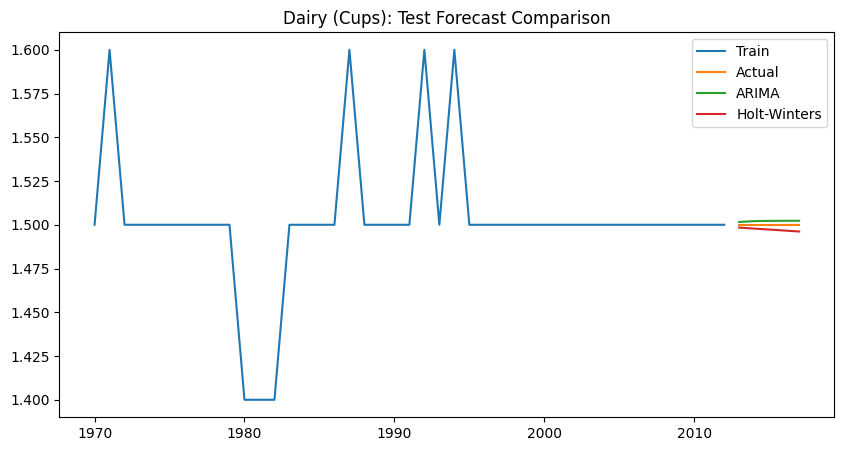

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


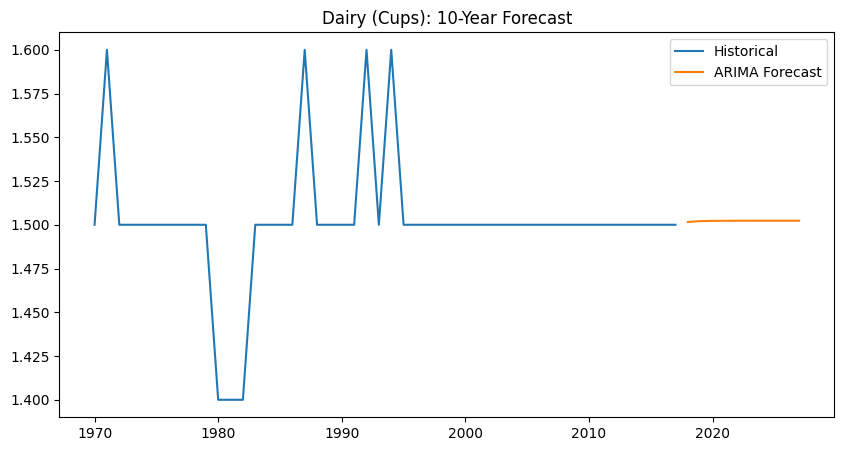


Processing Fruit (Cups)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

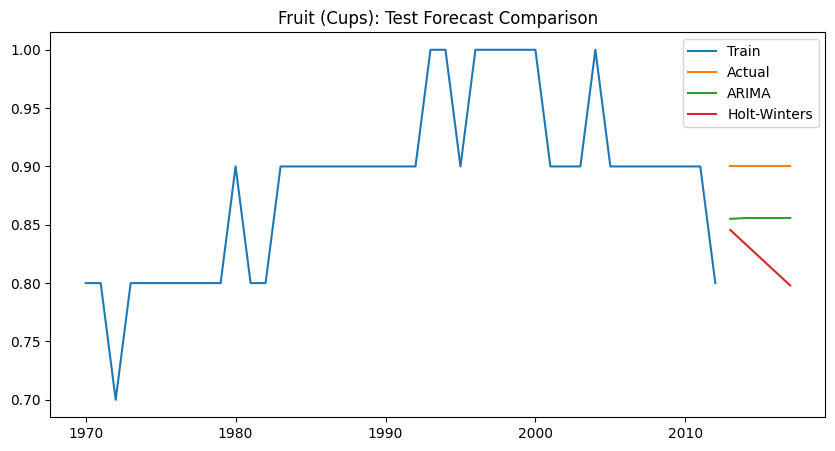

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


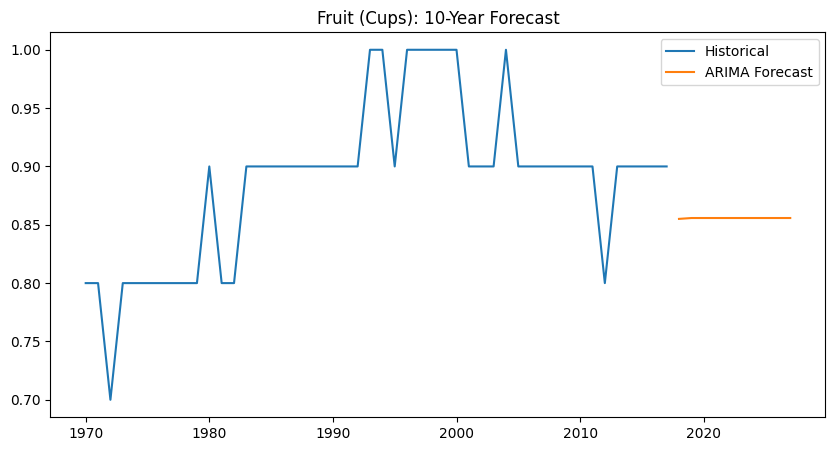


Processing Vegetables (Cups)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

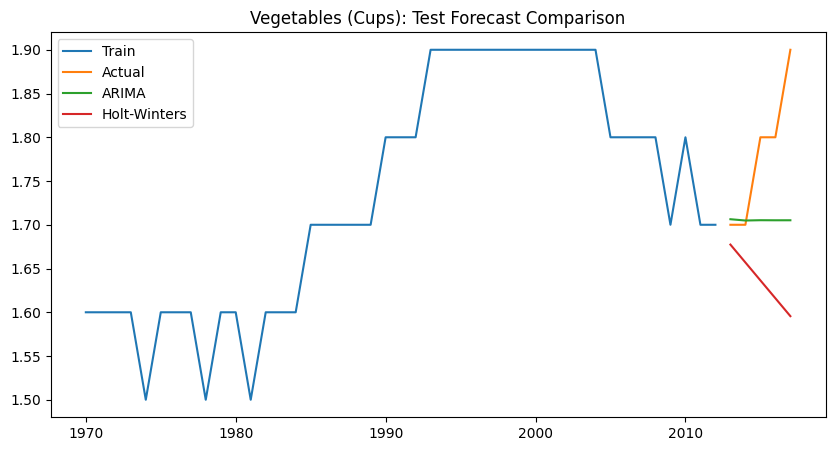

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


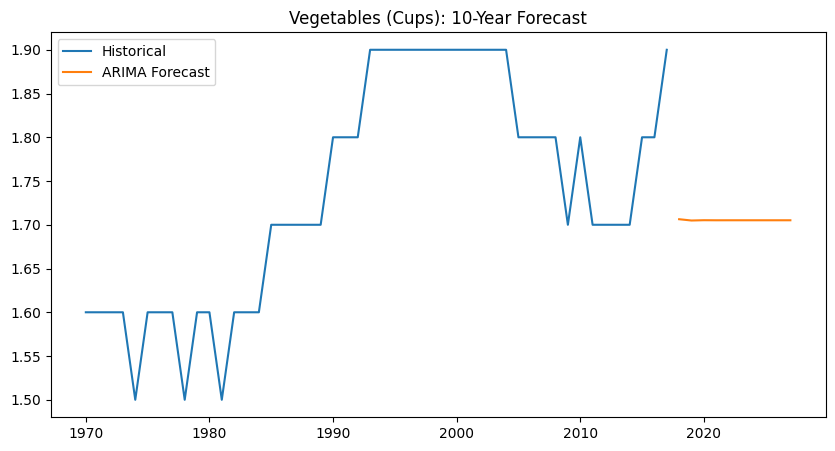


Processing Flour and cereal products (Ounces)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

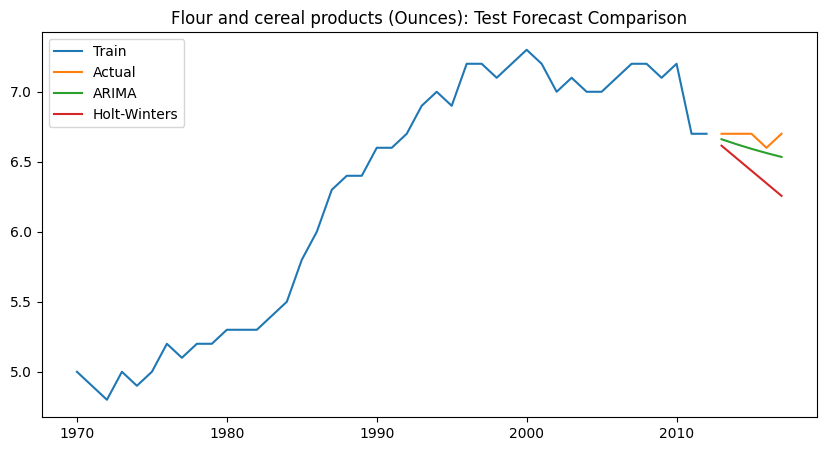

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


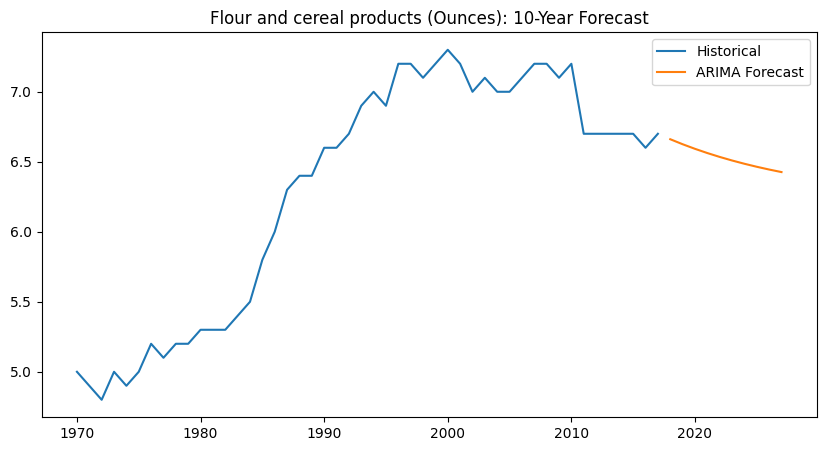


Processing Added fats and oils and dairy fats (Grams)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

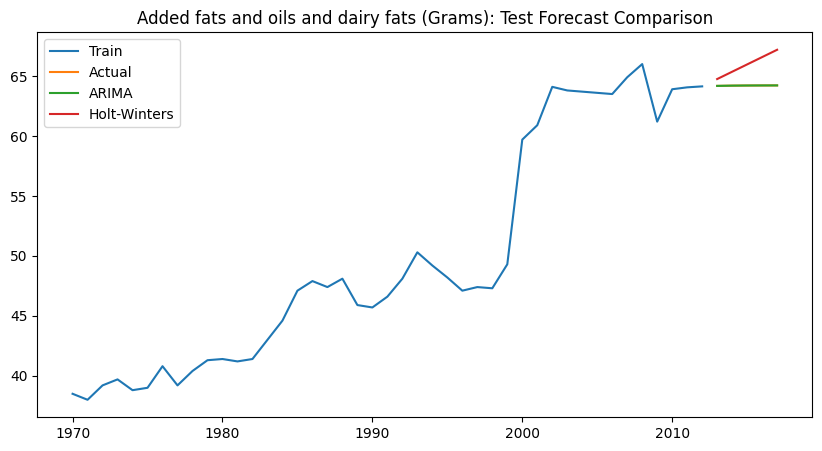

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


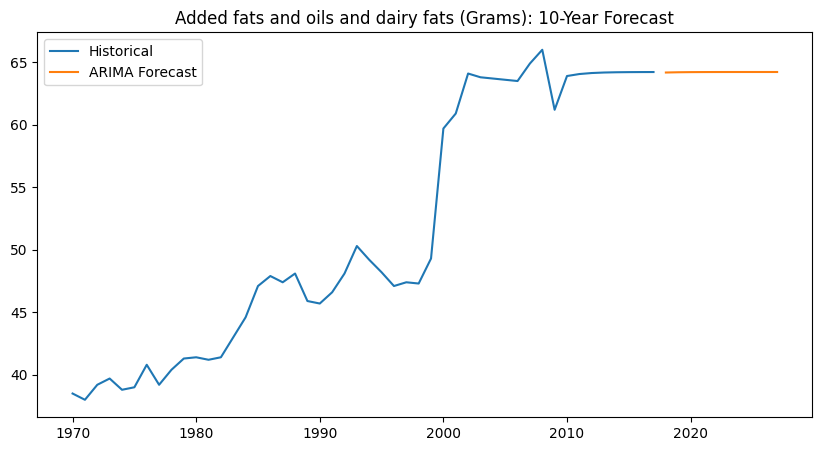


Processing Added sugars (Teaspoons)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

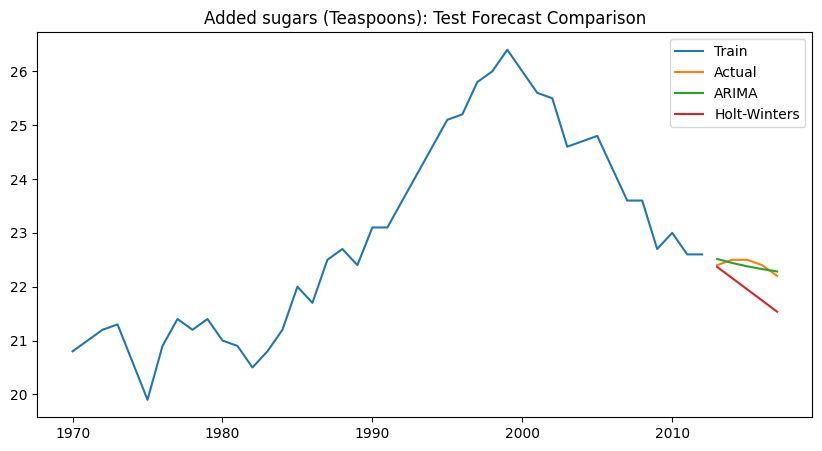

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


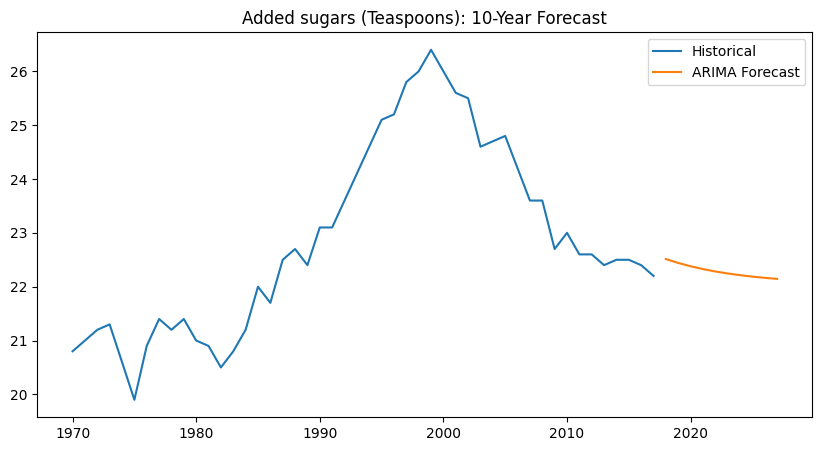

In [ ]:
for col in food_columns:
    print(f"\nProcessing {col}")

    series = df[col]  # all years 1970-2017, no dropna needed

    # -------------------------------
    # Train/Test split: last 5 years as test
    # -------------------------------
    train = series.iloc[:-5]
    test  = series.iloc[-5:]

    # -------------------------------
    # ARIMA model
    # -------------------------------
    model_arima = ARIMA(train, order=(1,1,1))
    model_fit = model_arima.fit()
    arima_pred = model_fit.forecast(steps=len(test))

    mape_arima = mean_absolute_percentage_error(test, arima_pred)
    rmse_arima = np.sqrt(mean_squared_error(test, arima_pred))

    # ====================================================
    # Model 2 — Holt-Winters (Exponential Smoothing)
    # ====================================================
    model_hw = ExponentialSmoothing(train, trend="additive", seasonal=None)
    hw_fit = model_hw.fit()
    hw_pred = hw_fit.forecast(5)

    mape_hw = mean_absolute_percentage_error(test, hw_pred)
    rmse_hw = np.sqrt(mean_squared_error(test, hw_pred))

    # -------------------------------
    # Store performance
    # -------------------------------
    results[col] = {
        "ARIMA_MAPE": mape_arima,
        "ARIMA_RMSE": rmse_arima,
        "HW_MAPE": mape_hw,
        "HW_RMSE": rmse_hw,
    }

    # ====================================================
    # Plot evaluation
    # ====================================================
    plt.figure(figsize=(10,5))
    plt.plot(train.index, train, label="Train")
    plt.plot(test.index, test, label="Actual")
    plt.plot(test.index, arima_pred, label="ARIMA")
    plt.plot(test.index, hw_pred, label="Holt-Winters")
    plt.title(f"{col}: Test Forecast Comparison")
    plt.legend()
    plt.show()

    # ====================================================
    # Choose best model for full future forecast
    # ====================================================
    if mape_arima < mape_hw:
        best = "ARIMA"
        future_pred = model_fit.forecast(steps=future_years)
    else:
        best = "Holt-Winters"
        future_pred = hw_fit.forecast(future_years)

    future_idx = list(range(last_year + 1, last_year + 1 + future_years))
    forecasts[col] = pd.Series(future_pred.values, index=future_idx)

    # Plot future forecast
    plt.figure(figsize=(10,5))
    plt.plot(series.index, series, label='Historical')
    plt.plot(future_idx, future_pred, label=f'{best} Forecast')
    plt.title(f"{col}: {future_years}-Year Forecast")
    plt.legend()
    plt.show()



In [ ]:
# =====================================================
# 4. Combine with original df
# =====================================================
future_df = pd.DataFrame(forecasts)
df_extended = pd.concat([df, future_df])

In [ ]:
display(df_extended)

,Meat & Eggs & Nuts (Ounces),Dairy (Cups),Fruit (Cups),Vegetables (Cups),Flour and cereal products (Ounces),Added fats and oils and dairy fats (Grams),Added sugars (Teaspoons)
1970,6.900000,1.500000,0.800000,1.600000,5.000000,38.500000,20.800000
1971,7.100000,1.600000,0.800000,1.600000,4.900000,38.000000,21.000000
1972,7.000000,1.500000,0.700000,1.600000,4.800000,39.200000,21.200000
1973,6.700000,1.500000,0.800000,1.600000,5.000000,39.700000,21.300000
1974,6.900000,1.500000,0.800000,1.500000,4.900000,38.800000,20.600000
1975,6.700000,1.500000,0.800000,1.600000,5.000000,39.000000,19.900000
1976,7.000000,1.500000,0.800000,1.600000,5.200000,40.800000,20.900000
1977,7.000000,1.500000,0.800000,1.600000,5.100000,39.200000,21.400000
1978,6.900000,1.500000,0.800000,1.500000,5.200000,40.400000,21.200000
1979,6.900000,1.500000,0.800000,1.600000,5.200000,41.300000,21.400000


In [ ]:
# =====================================================
# 5. Save results
# =====================================================
output_path = "/content/drive/MyDrive/Colab Notebooks/02_portfolio_tableau_viz/food_forecast_extended.csv"
df_extended.to_csv(output_path)